# **Tutorial sobre Logistic Regression**

## **Fundamentos de la técnica**

La regresión logistica es un modelo de clasificación supervisada utilizado para predecir clases binarias (0 o 1). Aunque su nombre contiene "regresión", en realidad se utiliza para clasificar, no para predecir valores continuos.

Su idea central es transformar una combinación lineal de las variables de entrada en una **probabilidad** mediante la **función sigmoide**, y luego asignar una clase según un umbral (generalmente 0.5).

## **Modelo Matemático**

El modelo comienza con una combinación lineal:


$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $


Luego aplica la **función sigmoide**:

$ \sigma(z) = \frac{1}{1 + e^{-z}}$


Esta función convierte cualquier número real en una **probabilidad entre 0 y 1**.

La probabilidad de pertenecer a la clase 1 es:


$P(y=1|x) = \sigma(z)$


Decisión final:

$$
\hat{y} = \begin{cases}
1 & \text{si } \sigma(z) \ge 0.5 \\
0 & \text{si } \sigma(z) < 0.5
\end{cases}
$$

El entrenamiento consiste en ajustar los parámetros $\beta$ usando **Maximum Likelihood Estimation**, típicamente mediante el algoritmo **Gradient Descent**.

## **Función de pérdida: Log-Loss**

Durante el entrenamiento, el modelo debe aprender los parámetros $\beta$.
No se utiliza error cuadrático por razones estadísticas y matemáticas.
En su lugar se utiliza la función **log-loss**, derivada del concepto Maximum Likelihood Estimation.

### **Pérdida para un solo ejemplo**

$$L(y, \hat{y}) = - \left[ y \cdot \ln(\hat{y}) + (1 - y) \cdot \ln(1 - \hat{y}) \right]$$
### **Pérdida total para el dataset**

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^{m}
\left[ y_{(i)} \ln(\hat{y}_{(i)}) +
(1 - y_{(i)}) \ln(1 - \hat{y}_{(i)}) \right]$$

Donde:
* $m$ = número de muestras
* $y_{(i)}$ = etiqueta real
* $\hat{y}_{(i)}$ = probabilidad predicha por el modelo

### **Optimización del modelo**

El objetivo del entrenamiento es:

$\min_{\beta} \; J(\beta)$

Es decir, encontrar los parametros $\beta$ que minimicen la log-loss.
Dado que no hay una solución analítica exacta, se usa **Gradient Descendent**.






## **Librerías y funciones a emplear en Python**

Para implementar Logistic Regression en Python normalmente se utiliza:

**sklearn.linear_model.LogisticRegression**

Funciones principales:
- .fit(X, y) - entrena el modelo
- .predict(X) - predice clases
- .predict_proba(X) - retorna probabilidades
- .coef_, .intercept_ - parámetros aprendidos

Para evaluar:
- confusion_matrix()
- accuracy_score()

Para preprocesar:
- train_test_split() para dividir datos
- StandardScaler() para normalizar variables

# **Pipeline**

## **Preprocesamiento**

1. Cargar el dataset.
2. Seleccionar dos características para graficar.
3. Convertir el problema en binario (Setosa = 0, No-Setosa = 1).
4. Obtener estadísticas básicas.
5. Graficar la dispersión para visualizar la separabilidad.

       sepal length (cm)  sepal width (cm)
count         150.000000        150.000000
mean            5.843333          3.057333
std             0.828066          0.435866
min             4.300000          2.000000
25%             5.100000          2.800000
50%             5.800000          3.000000
75%             6.400000          3.300000
max             7.900000          4.400000


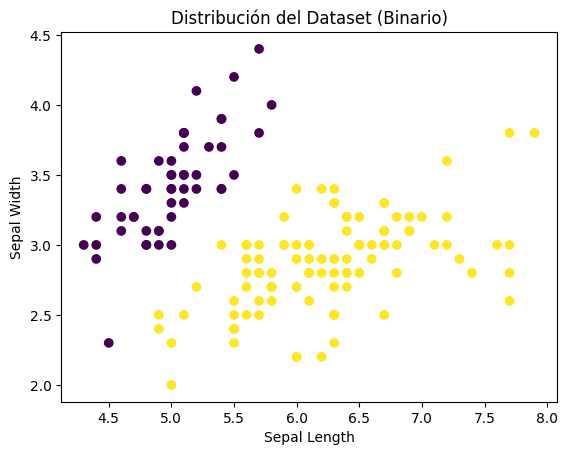

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# En este bloque de código cargamos el dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Convertiremos el problema a uno binario, donde solo tendremos Setosa vs No-Setosa
y_binary = (y != 0).astype(int)

# Tomamos dos características para visualizar
X = X.iloc[:, :2]  # sepal length, sepal width

# Previo análisis estadistico de las características
print(X.describe())

# Gráfico de dispersión
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_binary)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Distribución del Dataset (Binario)")
plt.show()

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Predicción**

Se entrena el modelo con Logistic Regression y se define una función personalizada que recibe un patrón nuevo y arroja la clase estimada.

In [5]:
from sklearn.linear_model import LogisticRegression

# Dividimos los datos con la funcion train_test_split, uno de los parametros más importantes es el test_size, en este caso asignado a 30% del total de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

# Entrenar modelo
model = LogisticRegression() #Creación del modelo
model.fit(X_train, y_train) #Ajuste del modelo

# Función de predicción
def clasificar_patron(patron):
    patron = scaler.transform([patron])
    pred = model.predict(patron)[0]
    print(f"El patrón {patron} fue clasificado como: {pred}")

# Ejemplo de un nuevo patrón por clasificar
clasificar_patron([5.0, 3.4])


El patrón [[-1.02184904  0.78880759]] fue clasificado como: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Evaluación del modelo**

Se evalúa el desempeño mediante:
- Matriz de Confusión
- Accuracy

### **Matriz de confusión**
La matriz de confusión es una tabla que permite evaluar el rendimiento de un modelo de clasificación comparando directamente las predicciones del modelo contra los valores reales de los datos, es decir, compara la etiqueta que el modelo predice para cada dato, contra la etiqueta real de ese mismo dato.

En un problema de clasificación binaria (0 y 1), la matriz luce así:

|                      | Predicho: 0 | Predicho: 1 |
|----------------------|-------------|-------------|
| **Real: 0**          | TN          | FP          |
| **Real: 1**          | FN          | TP          |


### Significado de cada término

* **TP (True Positive):** El modelo predijo 1 y el dato realmente era 1.
* **TN (True Negative):** El modelo predijo 0 y el dato realmente era 0.
* **FP (False Positive):** El modelo predijo 1 y el dato realmente era 0.
* **FN (False Negative):** El modelo predijo 0 y el dato realmente era 1.

La matriz de confusión nos permite ver exactamente cuántos aciertos y fallos tuvo el modelo, así como detectar errores especifícos, evaluar de forma más completa que solo medir el accuracy, e incluso identificar si el modelo está sesgado hacia alguna clase.


### **Accuracy**

El Accuracy mide el porcentaje de predicciones que el modelo acertó, se calcula de la siguiente forma:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Es decir, **Accuracy = (predicciones correctas) / (total de casos)**

El Accuracy indica que tan bien está clasificando el modelo en términos generales, es útil cuando las clases están bien balanceadas y es fácil de interpretar, sin embargo, si las clases están muy desvalaceadas el Accuracy puede ser engañoso.




In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Matriz de Confusión:
 [[19  0]
 [ 0 26]]
Accuracy: 1.00


## **Referencias Bibliográficas**

numiqo - Español. (2024, September 22). Regresión Logística [Fácilmente explicable] [Video]. YouTube. https://www.youtube.com/watch?v=mjbWGx6Xgvg

T-Test, Chi-Square, ANOVA, Regression, Correlation. . . (n.d.). https://numiqo.es/tutorial/logistic-regression

Regresión logística. (n.d.). Google for Developers. https://developers.google.com/machine-learning/crash-course/logistic-regression?hl=es-419


